In [3]:
import pandas as pd
import numpy as np

In [4]:
df_treino = pd.read_csv('datasets/processed/features.csv',index_col=0).reset_index(drop = True)

# features = df_treino[
#     ['codigo_le',
#     'unid_le',
#     'Tipologia_le',
#     'Área Terreno',
#     'Área Construída',
#     'Área Fundação',
#     'Área Fachada',
#     'Área Parede'
#     ]
# ]

corr = df_treino.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)#.set_properties(**{'font-size': '0pt'})

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

C:\Users\simon\AppData\Local\Temp\ipykernel_676\3414408416.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_treino.corr()


,quantidade,preco_material_unitario,preco_material_total,preco_execucao_unitario,preco_execucao_total,preco_unitario,preço_total,primeiro,segundo,terceiro,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,codigo_le,unid_le,Tipologia_le
quantidade,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
preco_material_unitario,-0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
preco_material_total,0.42,0.21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
preco_execucao_unitario,-0.15,-0.08,-0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
preco_execucao_total,0.73,-0.11,0.69,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
preco_unitario,-0.17,0.92,0.16,0.32,-0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
preço_total,0.56,0.12,0.97,-0.07,0.85,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
primeiro,0.21,0.35,0.23,-0.13,0.06,0.28,0.19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
segundo,0.14,0.23,0.18,0.12,0.11,0.27,0.17,0.45,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
terceiro,0.06,0.30,0.17,0.05,0.00,0.31,0.13,0.71,0.63,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [5]:
df_treino[['preço_total','Titulo']].groupby('Titulo').sum().reset_index()

,Titulo,preço_total
0,Projeto 1 - Wa,1051728.18
1,Projeto 2 - Ca,856967.32
2,Projeto 3 - Je2,1523008.38


In [6]:
df_treino1 = df_treino[df_treino['quantidade'] > 0]
df_treino1[['codigo','preço_total','Titulo']].groupby(['codigo','Titulo']).mean()

preço_total
codigo                   Titulo                      
CMP_AAB-AB-16-LS_060X060 Projeto 2 - Ca        540.00
CMP_ACB-GRM-ESM          Projeto 1 - Wa       2327.00
                         Projeto 2 - Ca       1628.22
                         Projeto 3 - Je2      1675.91
CMP_ACB-INT-PRT-GNT-CLR  Projeto 1 - Wa        956.00
...                                               ...
CMP_TRN-LPZ-CTT          Projeto 1 - Wa       5432.00
                         Projeto 2 - Ca       3360.00
                         Projeto 3 - Je2      5600.00
CMP_TRN-TER-ATR          Projeto 1 - Wa      11841.98
                         Projeto 3 - Je2     10793.48

[226 rows x 1 columns]

Previsão

In [7]:
df = pd.read_csv('datasets/predict/predict.csv',index_col=0).reset_index(drop = True)

def prices(df):
    df['preco_material_total_pred'] = df['quantidade_pred'] * df['preco_material_unitario_pred']
    df['preco_execucao_unitario_pred'] = df['quantidade_pred'] * df['execucao_unitario_model']
    df['preço_total_pred'] = df['preco_material_total_pred'].round(2) + df['preco_execucao_unitario_pred'].round(2)
    return df

df = prices(df)
df[['preço_total_pred','Titulo']].groupby('Titulo').sum().reset_index()

,Titulo,preço_total_pred
0,Projeto 4 - Je3,2165006.13


In [8]:
df

,codigo,unid,Titulo,Tipologia,Área Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,codigo_le,unid_le,Tipologia_le,quantidade_pred,preco_material_unitario_pred,execucao_unitario_model,preco_material_total_pred,preco_execucao_unitario_pred,preço_total_pred
0,CMP_AAB-AB-16-LS_060X060,UN,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,0,3,0,1.00,540.00,0.00,540.0000,0.00,540.00
1,CMP_ACB-GRM-ESM,M2,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,1,0,0,98.68,16.50,0.00,1628.2200,0.00,1628.22
2,CMP_ACB-INT-PRT-GNT-CLR,ML,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,2,2,0,19.40,55.00,45.00,1067.0000,873.00,1940.00
3,CMP_ACB-MUD-IPE,UN,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,3,3,0,4.80,100.00,45.00,480.0000,216.00,696.00
4,CMP_CAL-EXT-PAV,M2,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,4,0,0,22.22,52.45,35.00,1165.4390,777.70,1943.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,CMP_SUP_LAJ-CON-TRL-012,M2,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,99,0,0,207.94,265.31,100.00,55168.5614,20794.00,75962.56
100,CMP_SUP_LAJ-CON-TRL-012-INC,M2,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,100,0,0,27.09,265.31,205.00,7187.2479,5553.45,12740.70
101,CMP_SUP_LAJ-IMP,M2,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,101,0,0,27.09,70.04,100.00,1897.3836,2709.00,4606.38
102,CMP_TRN-LPZ-CTT,M2,Projeto 4 - Je3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,102,0,0,300.00,0.00,11.20,0.0000,3360.00,3360.00


In [9]:
from predict import load_models

In [10]:
model1, model2, model3 = load_models()

In [23]:
features = ['codigo_le',
    'unid_le',
    'Tipologia_le',
    'Área Terreno',
    'Área Construída',
    'Área Fundação',
    'Área Fachada',
    'Área Parede'
    ]

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt
r = tree.export_text(model1, feature_names = features)
print(r)

|--- codigo_le <= 58.50
|   |--- codigo_le <= 0.50
|   |   |--- Área Terreno <= 150.00
|   |   |   |--- value: [0.00]
|   |   |--- Área Terreno >  150.00
|   |   |   |--- value: [1.00]
|   |--- codigo_le >  0.50
|   |   |--- unid_le <= 2.50
|   |   |   |--- codigo_le <= 8.50
|   |   |   |   |--- codigo_le <= 1.50
|   |   |   |   |   |--- Tipologia_le <= 0.50
|   |   |   |   |   |   |--- Área Construída <= 337.12
|   |   |   |   |   |   |   |--- value: [98.68]
|   |   |   |   |   |   |--- Área Construída >  337.12
|   |   |   |   |   |   |   |--- value: [101.57]
|   |   |   |   |   |--- Tipologia_le >  0.50
|   |   |   |   |   |   |--- value: [141.03]
|   |   |   |   |--- codigo_le >  1.50
|   |   |   |   |   |--- codigo_le <= 5.50
|   |   |   |   |   |   |--- unid_le <= 1.00
|   |   |   |   |   |   |   |--- Área Fachada <= 672.52
|   |   |   |   |   |   |   |   |--- codigo_le <= 4.50
|   |   |   |   |   |   |   |   |   |--- Área Construída <= 335.82
|   |   |   |   |   |   |   |   |   

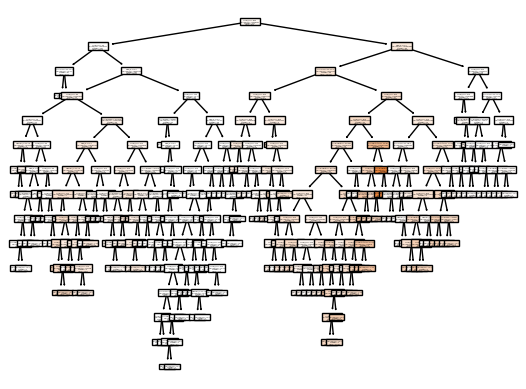

In [27]:
fig = plt.figure()
_ = tree.plot_tree(model1, 
                   feature_names=features,  
                   #class_names=iris.target_names,
                   filled=True)

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(120,100))
# _ = tree.plot_tree(model1, 
#                     feature_names=model1.feature_names_in_,  
# #                    class_names=iris.target_names,
#                    filled=True)

In [ ]:
# fig.savefig('a.png')

In [32]:
a = df_treino[['preço_total','Titulo']].groupby('Titulo').sum().reset_index()
b = df[['preço_total_pred','Titulo']].groupby('Titulo').sum().reset_index()
b = b.rename(columns={"preço_total_pred": "preço_total"})

result = pd.concat([a,b])

In [33]:
result

,Titulo,preço_total
0,Projeto 1 - Wa,1051728.18
1,Projeto 2 - Ca,856967.32
2,Projeto 3 - Je2,1523008.38
0,Projeto 4 - Je3,2165006.13
